In [1]:
import os
from itertools import product

import holoviews as hv
import numpy as np
import pandas as pd
import panel as pn
import param
import scipy
from matplotlib import pyplot as plt
from scipy import io as sio
from scipy import signal
from holoviews import opts

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
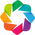

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [24, 9]
hv.extension('bokeh')
%matplotlib inline

### Carregando Dados

In [3]:
base_data_path = os.path.abspath('./data/')
dados_sistema = sio.loadmat(os.path.join(base_data_path, 'dados_sistema'))
refletividade = sio.loadmat(os.path.join(base_data_path, 'refletividade'))
sismograma = sio.loadmat(os.path.join(base_data_path, 'sismograma'))

In [4]:
primarias = pd.read_csv(os.path.join(base_data_path, 'primarias.mat'), index_col=None).values.reshape(-1)
traco = pd.read_csv(os.path.join(base_data_path, 'traco.mat'), index_col=None).values.reshape(-1)

## Problema 1

In [5]:
A = np.array([
    [1, -0.2, -0.4],
    [-0.2, 0.6, 0],
    [0.4, -0.2, 1],
])
b = np.array([1, 0, 0])
r_x = np.linalg.solve(A, b)

In [6]:
scipy.linalg.toeplitz(r_x)

array([[ 0.9375,  0.3125, -0.3125],
       [ 0.3125,  0.9375,  0.3125],
       [-0.3125,  0.3125,  0.9375]])

## Problema 2

In [7]:
def make_correlation_matrix(correlation, num_samples):
    base_line = np.array(correlation[:num_samples])
    return toeplitz(base_line)

In [8]:
def squared_error(reference, estimate, normalize=True):
    error = reference - estimate
    squared_error = np.power(error, 2).sum()
    return squared_error if not normalize else squared_error / reference.shape[0]

In [9]:
def estimate_signal(entry_signal, output_signal, num_parameters):
    lag_zero = entry_signal.shape[0] - 1
    r_x = np.correlate(entry_signal, entry_signal, 'full')[lag_zero : lag_zero + num_parameters]
    p_xd = np.correlate(output_signal, entry_signal, 'full')[lag_zero : lag_zero + num_parameters]

    inv_corr_mat = scipy.linalg.inv(scipy.linalg.toeplitz(r_x))

    optimal_params = inv_corr_mat @ p_xd
    
    estimate = np.convolve(entry_signal, optimal_params, 'full')[:entry_signal.shape[0]]
    
    return estimate

#### 2.B: Curva de Erro Quadrático Médio
Abaixo, construímos um conjunto de estimativas para o erro quadrático médio de predição para filtros indo de 1 a 50
coeficientes. As curvas de erro ilustradas mostram todos os pontos calculados e os primeiros 15, respectivamente.

Podemos notar que o erro quadrático médio diminui com o aumento do número de parâmetros, tornando-se nulo para um
filtro com algo em torno de 15 parâmetros. Podemos considerar que a partir de 10 parâmetros o resultado já se torna
bastante estável.

In [10]:
series_x = pd.Series(dados_sistema['x'].ravel())
series_d = pd.Series(dados_sistema['d'].ravel())

In [11]:
error_estimates = [squared_error(series_d, estimate_signal(series_x, series_d, M), True) for M in range(1, 50)]

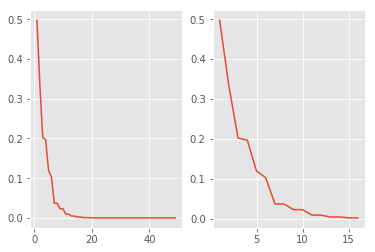

In [12]:
get_first = 16
plt.subplot(121)
plt.plot(np.array(range(len(error_estimates))) + 1, error_estimates)
plt.subplot(122)
plt.plot(np.array(range(get_first)) + 1, error_estimates[:get_first])
plt.savefig('wiener')

#### 2.C: A saída do filtro para vários números de parâmetros
O gráfico abaixo (JavaScript, então é importante executar com Jupyter Notebook e não Lab) permite visualizar a saída
para filtros com 1 a 50 parâmetros.

In [13]:
class VisualizadorPreditorFIR(param.Parameterized):
    def __init__(self, entry_signal, output_signal, num_samples=50):
        self.entry_signal = entry_signal
        self.output_signal = output_signal
        self.num_samples = num_samples
    
    num_parameters = param.Integer(default=5, bounds=(1, 50))
    
    def make_estimate(self):
        lag_zero = self.entry_signal.shape[0] - 1
        r_x = np.correlate(self.entry_signal, self.entry_signal, 'full')[lag_zero : lag_zero + self.num_parameters]
        p_xd = np.correlate(self.output_signal, self.entry_signal, 'full')[lag_zero : lag_zero + self.num_parameters]

        inv_corr_mat = scipy.linalg.solve_toeplitz(r_x, np.eye(self.num_parameters))

        optimal_params = inv_corr_mat @ p_xd

        estimate = np.convolve(self.entry_signal, optimal_params, 'full')[:self.entry_signal.shape[0]]

        return estimate
    
    @param.depends('num_parameters')
    def visualize_estimate(self):
        estimate = self.make_estimate()
        estimate_curve = hv.Curve(estimate[:self.num_samples], label='Estimated Signal')
        reference_curve = hv.Curve(self.output_signal.values[:self.num_samples], label='Reference Signal')

        return (estimate_curve * reference_curve).opts(width=600)

In [14]:
explorer = VisualizadorPreditorFIR(series_x, series_d)

dmap = hv.DynamicMap(explorer.visualize_estimate)

pn.Row(explorer.param, dmap)

Row
    [0] Column(name='Param01320', width=300)
        [0] StaticText(value='<b>VisualizadorPreditorFI...)
        [1] IntSlider(end=50, name='Num parameters', start=1, value=5)
    [1] HoloViews(DynamicMap)

#### 2.D: Filtro de Erro de Predição
Vamos aplicar um filtro de erro de predição progressiva a passo unitário sobre o sinal de saída do sistema, D.

In [15]:
def estimate_error_filter(signal, num_parameters):
    lag_zero = signal.shape[0] - 1
    r_x = np.correlate(signal, signal, 'full')[lag_zero : lag_zero + num_parameters + 1]

    inv_corr_mat = scipy.linalg.solve_toeplitz(r_x[:-1], np.eye(num_parameters))

    optimal_params = inv_corr_mat @ r_x[1:]
    
    estimate = np.convolve(signal, optimal_params, 'full')[:signal.shape[0]]
    
    return estimate

In [16]:
class VisualizadorFiltroErro(param.Parameterized):
    def __init__(self, signal, num_samples=50):
        self.signal = signal
        self.num_samples = num_samples
    
    num_parameters = param.Integer(default=2, bounds=(1, 50))
    
    def make_estimate(self):
        lag_zero = self.signal.shape[0] - 1
        r_x = np.correlate(self.signal, self.signal, 'full')[lag_zero : lag_zero + self.num_parameters + 1]

        inv_corr_mat = scipy.linalg.solve_toeplitz(r_x[:-1], np.eye(self.num_parameters))

        optimal_params = inv_corr_mat @ r_x[1:]

        estimate = np.convolve(self.signal, optimal_params, 'full')[:self.signal.shape[0]]

        return estimate
    
    @param.depends('num_parameters')
    def visualize_estimate(self):
        estimate = self.make_estimate()
        estimate_curve = hv.Curve(estimate[:self.num_samples], label='Estimated Signal')
        reference_curve = hv.Curve(self.signal.values[:self.num_samples], label='Reference Signal')

        return (estimate_curve * reference_curve).opts(width=600)

In [17]:
error_estimates = [squared_error(series_d, pd.Series(estimate_error_filter(series_d, M)).shift(1), True) for M in range(1, 50)]

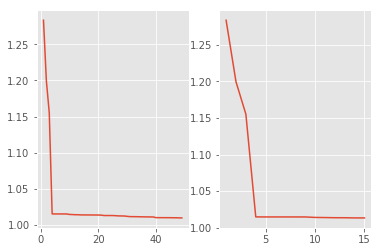

In [18]:
get_first = 15
plt.subplot(121)
plt.plot(np.array(range(len(error_estimates))) + 1, error_estimates)
plt.subplot(122)
plt.plot(np.array(range(get_first)) + 1, error_estimates[:get_first])
plt.savefig('erro')

In [19]:
explorer = VisualizadorFiltroErro(series_d)

dmap = hv.DynamicMap(explorer.visualize_estimate)

pn.Row(explorer.param, dmap)

Row
    [0] Column(name='Param01510', width=300)
        [0] StaticText(value='<b>VisualizadorFiltroErro...)
        [1] IntSlider(end=50, name='Num parameters', start=1, value=2)
    [1] HoloViews(DynamicMap)

#### 2.E e F: O que podemos tirar do erro?
Abaixo, temos a média, a variância e o gráfico da autocorrelação estimada para o sinal de erro de predição.
Para gerar esse sinal, usamos um filtro com 10 parâmetros. No gráfico do item 2.D, podemos ver que o erro
quadrático começa a estabilizar por volta de 4 parâmetros, de forma que esperaria que qualquer número de parâmetros
após isso gerasse resultados similares ou iguais.

Podemos notar que:
1. A média do sinal de erro é aproximadamente nula (-0.006);
2. A variância do sinal é $\approxeq 0.81$;
3. A função de autocorrelação do sinal erro é razoavelmente impulsiva, se olharmos o sinal completo de correlação. 
Podemos discutir que há um viés no gráfico, e que visto mais de perto esse sinal não parece impulsivo, oscilando
por cerca de 25 amostras até atingir valores próximos a 0.

As curvas de erro quadrático médio nos indicam que o preditor FIR com parâmetros de Wiener e o filtro de erro de predição
progressiva a passo unitário obtêm estimativas que tendem a estabilidade com o aumento do número de coeficientes.
O filtro de Wiener tem erro tendendo a zero, sendo a contribução de cada novo parâmetro cada vez menor. O filtro de erro
atinge uma condição em que o erro de predição não melhora muito.

O comportamento do erro quadrático médio com o número de parâmetros no filtro de erro (redução acentuada no começo, com
diminuição na contribuição de coeficientes subsequentes, até estabilização) indica que o sistema desconhecido comporta-se
como filtro IIR. O patamar de erro atingido indica a ordem do sistema em questão. Esse raciocínio se justifica por conseguirmos
uma estimativa estável, e que atinge um mínimo de erro, do sistema com um filtro de fase mínima.

A partir dessas considerações, podemos entender que o filtro de Wiener obtido anteriormente deve eventualmente aproximar
a resposta do sistema desconhecido de forma ótima, por ter a estrutura inversa. No momento que o filtro de Wiener tiver
a mesma ordem do filtro, os parâmetros do filtro de Wiener serão os mesmos do sistema estimado, e todos os parâmetros
adicionados em sequência serão nulos ou próximos de zero.

In [20]:
estimate = pd.Series(estimate_error_filter(series_d, num_parameters=10))
error = series_d - estimate

print("Prediction Error Mean: ", error.mean())
print("Prediction Error Variance: ", error.var())

Prediction Error Mean:  -0.006085866213321708
Prediction Error Variance:  0.8157912499825941


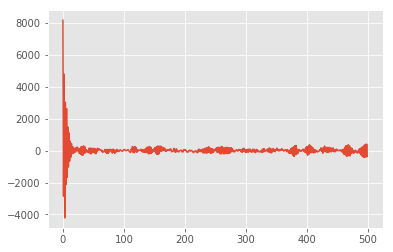

In [21]:
plt.plot(np.correlate(error, error, 'full')[error.shape[0]-1:error.shape[0]-1 + 500])

## Problema 3

In [22]:
def sqr_error(weights, R, p):
    weights = np.array(weights).reshape(-1)
    var = 1
    p_xd = p.reshape(-1)
    
    return var - 2 * weights.T @ p_xd + weights.T @ R @ weights

#### 3.C: Soluções de Wiener para atrasos de 0 a 5
Abaixo, são calculadas as soluções de Wiener e os erros para os atrasos de 0 a 5. O menor valor de erro
é obtido com atraso 3, com peso maior no segundo coeficiente do que no primeiro.

In [23]:
R = np.array([
    [2.23, 1.05],
    [1.05, 2.23]
])
R_inv = scipy.linalg.inv(R)

##### Atraso 0

In [24]:
p_xd = np.array([0.2, 0])
w_o_0 = R_inv @ p_xd
w_o_0, sqr_error(w_o_0, R, p_xd)

(array([ 0.11523357, -0.05425796]), 0.9769532864820173)

##### Atraso 1

In [25]:
p_xd = np.array([0.7, 0.2])
w_o_1 = R_inv @ p_xd
w_o_1, sqr_error(w_o_1, R, p_xd)

(array([ 0.34905953, -0.07466928]), 0.7705921868540719)

##### Atraso 2

In [26]:
p_xd = np.array([1.3, 0.7])
w_o_2 = R_inv @ p_xd
w_o_2, sqr_error(w_o_2, R, p_xd)

(array([0.55911534, 0.05064076]), 0.23770152955766843)

##### Atraso 3

In [27]:
p_xd = np.array([0, 1.3])
w_o_3 = R_inv @ p_xd
w_o_3, sqr_error(w_o_3, R, p_xd)

(array([-0.35267673,  0.74901819]), 0.026276353865233526)

##### Atraso 4

In [28]:
p_xd = np.array([0, 0])
w_o_4 = R_inv @ p_xd
w_o_4, sqr_error(w_o_4, R, p_xd)

(array([0., 0.]), 1.0)

##### Atraso 5

In [29]:
p_xd = np.array([0, 0])
w_o_5 = R_inv @ p_xd
w_o_5, sqr_error(w_o_5, R, p_xd)

(array([0., 0.]), 1.0)

#### 3.D: Curva de erro
As curvas obtidas são parabolóides elípticos, com os valores de erro variando mais acentuadamente quando os pesos têm sinais diferentes e se afastam de 0.
De forma geral, a reta w1=w0 apresenta variação muito mais acentuada do erro, e analogamente um maior gradiente de erro.

In [30]:
w0 = np.linspace(-5, 5, 100)
p_xd = np.array([0, 1.3])

points = list(product(w0, repeat=2))
errors = np.array([sqr_error(point, R, p_xd) for point in points])

xx = np.array([point[0] for point in points])
yy = np.array([point[1] for point in points])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Scatter3D   [x,y,z]
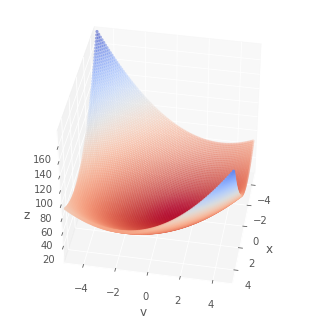

In [31]:
hv.extension('matplotlib')
hv.Scatter3D((xx.flat, yy.flat, errors.flat)).opts(
    opts.Scatter3D(color='z', cmap='coolwarm_r', elevation=40, azimuth=10, s=10)
)

Text(0, 0.5, 'W0')

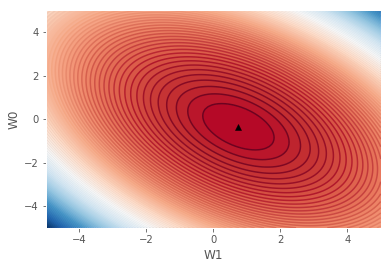

In [32]:
plt.contourf(w0, w0, errors.reshape(w0.shape[0], -1), cmap='coolwarm_r', levels=100)
plt.contour(w0, w0, errors.reshape(w0.shape[0], -1), cmap='RdBu', levels=100)

R = np.array([
    [2.23, 1.05],
    [1.05, 2.23]
])
p_xd = np.array([0, 1.3]).reshape(-1)

w = scipy.linalg.inv(R) @ p_xd
plt.scatter(w[1], w[0], c='k', marker='^')

plt.xlabel('W1')
plt.ylabel('W0')

#### 3.E: Resposta Combinada
Abaixo, temos as respostas combinadas dos filtros para os atrasos 0, 1, 2 e 3.
Podemos notar alguma similaridade entre as soluções para atrasos 0, 1 e 2. Nessas soluções, as amostras
de lag 0, 1 e 2 têm peso crescente, com a amostra de peso 3 tendo peso negativo nas duas primeiras e um
peso de pequena magnitude para atraso 2.

Para essas soluções, vemos que não há um peso dominante, e que mais de um atraso importa na
estimativa do sinal de entrada atrasado. Isso, intuitivamente, não faz tanto sentido, já que o sinal de
entrada é branco. Esperaríamos que uma resposta conjunta para estimar o sinal atrasado tivesse um peso
dominante, localizado na amostra de lag correspondente ao que estamos usando como referência.
Esse é justamente o caso observado para o lag 3, em que o filtro tem três pesos de magnitudes pequenas
e um peso consideravelmente maior localizado no lag 3.

Esse filtro gera estimativas de melhor qualidade, e para isso leva em consideração (praticamente) apenas
a amostra de lag que se quer estimar.

In [33]:
h = [0.2, 0.7, 1.3]
c_0 = np.convolve(h, w_o_0, 'full')
c_1 = np.convolve(h, w_o_1, 'full')
c_2 = np.convolve(h, w_o_2, 'full')
c_3 = np.convolve(h, w_o_3, 'full')

<StemContainer object of 3 artists>

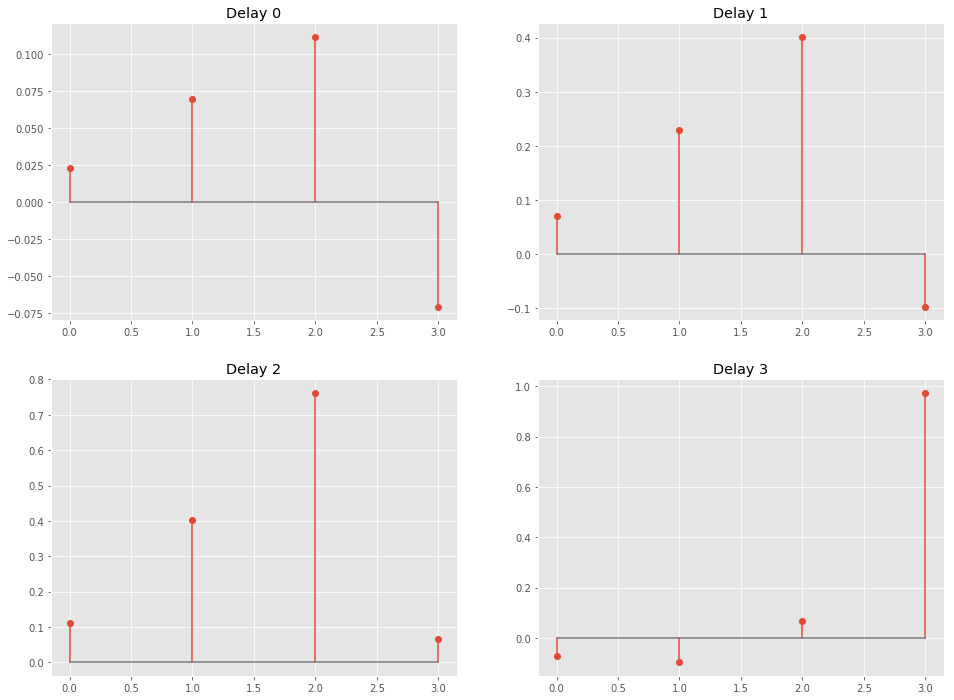

In [34]:
plt.rcParams['figure.figsize'] = (16, 12)
plt.subplot(221)
plt.title('Delay 0')
plt.stem(range(c_0.shape[0]), c_0)

plt.subplot(222)
plt.title('Delay 1')
plt.stem(range(c_1.shape[0]), c_1)

plt.subplot(223)
plt.title('Delay 2')
plt.stem(range(c_2.shape[0]), c_2)

plt.subplot(224)
plt.title('Delay 3')
plt.stem(range(c_3.shape[0]), c_3)

#### 3.F, G, H: Filtros de Wiener, Erro Progressivo e Retrógrado

In [35]:
r_x = np.array([2.23, 1.05, 0.26, 0, 0, 0, 0, 0])
R = scipy.linalg.toeplitz(r_x)
p_xd = np.array([0, 0, 0, 0, 0, 0, 0, 1.3])

w_o = scipy.linalg.inv(R) @ p_xd

In [36]:
w_o.round(4).tolist()

[-0.0001, -0.002, 0.0094, -0.0197, 0.0078, 0.1018, -0.4083, 0.7633]

In [37]:
r_x = np.array([2.23, 1.05, 0.26, 0, 0, 0, 0, 0])
R = scipy.linalg.toeplitz(r_x)

w_f = scipy.linalg.inv(R)[1:, 1:] @ r_x[1:]

In [38]:
w_f.round(4).tolist()

[0.7004, -0.1747, -0.0135, 0.0339, -0.016, 0.0035, 0.0002]

In [39]:
r_x = np.array([2.23, 1.05, 0.26, 0, 0, 0, 0, 0])
R = scipy.linalg.toeplitz(r_x)

w_b = scipy.linalg.inv(R)[1:, 1:] @ r_x[1:][::-1]

In [40]:
w_b.round(4).tolist()

[0.0004, 0.0026, -0.0123, 0.0259, -0.0103, -0.1334, 0.5349]

#### 3.I: Comparando os resultados obtidos para os filtros
Se observarmos os coeficientes das filtros obtidos, podemos notar que os coeficientes do filtro de erro de predição
retrógrada têm módulo crescente (módulo dos parâmetros aumenta de 0 para 7) e, de forma geral, são muito similares
aos coeficientes do filtro de Wiener.
Esse alinhamento ocorre porque o sistema H() é um sistema que gera um processo MA em sua saída, a partir do processo S().
Esse processo MA pode ser estimado por um filtro de erro de predição retrógrado de passo unitário com número adequado de
coeficientes, de forma análoga à estimativa de um processo AR por um FEPPPU. O erro de predição retrógrada diminui com a
adição de novos coeficientes, até o ponto em que adicionar novos coeficientes passa a não fazer muita diferença no resultado.
Esse ponto ajuda a estimar a ordem do processo MA original e a partir dele o processo de desconvolução será próximo do 
obtido se tivesse sido utilizado um filtro de Wiener.

Os coeficientes do filtro de erro progressivo, por outro lado, têm ordenação invertida, decrescendo conforme o
deslocamento da amostra. Esse filtro tem fase mínima, e não gera uma aproximação suficientemente próxima do processo MA
de entrada. Dessa forma, seu erro segue sendo consideravelmente diferente do sinal S que queremos obter a partir da
desconvolução. Se o filtro H fosse de fase mínima, o resultado seria invertido: o filtro progressivo teria uma melhor
aproximação do que o filtro retrógrado, e seria mais parecido com o filtro de Wiener.

#### 3.J: Aplicando os filtros projetados

In [41]:
s_alphabet = [-1, 1]
num_samples = 1000

N_mean = 0
N_std = 0.1

H_coef = [0.2, 0.7, 1.3]

alpha = 9


s = np.random.choice(s_alphabet, num_samples)
t = signal.lfilter(H_coef, [1], s)
n = np.random.normal(N_mean, N_std, num_samples)
x = t + n


d = pd.Series(s).shift(alpha)

In [42]:
y_wiener = signal.lfilter(w_o, [1], x)
y_forward = signal.lfilter([1], [1] + (-1 * w_f).tolist(), x)
y_backward = signal.lfilter((-1 * w_b).tolist() + [1], [1], x)

Text(0.5, 1.0, 'Aplicação do Filtro de Wiener')

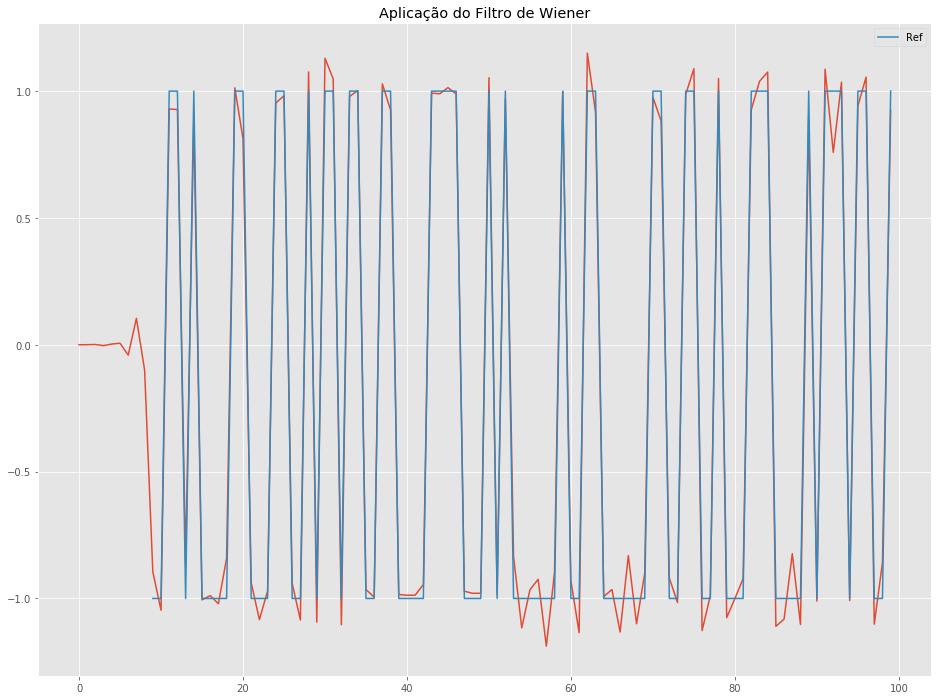

In [43]:
plt.plot(y_wiener[:100])
plt.plot(d[:100], label='Ref')
plt.legend()
plt.title('Aplicação do Filtro de Wiener')

Text(0.5, 1.0, 'Aplicação do Preditor de Erro Progressivo')

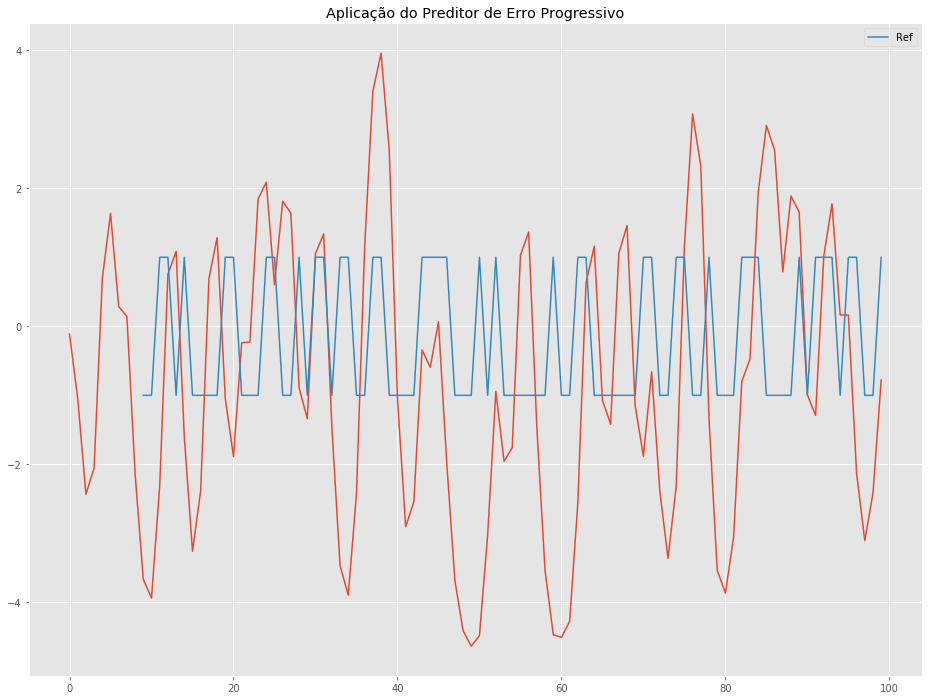

In [44]:
plt.plot(y_forward[:100])
plt.plot(d[:100], label='Ref')
plt.legend()
plt.title('Aplicação do Preditor de Erro Progressivo')

Text(0.5, 1.0, 'Aplicação do Preditor de Erro Retrógrado')

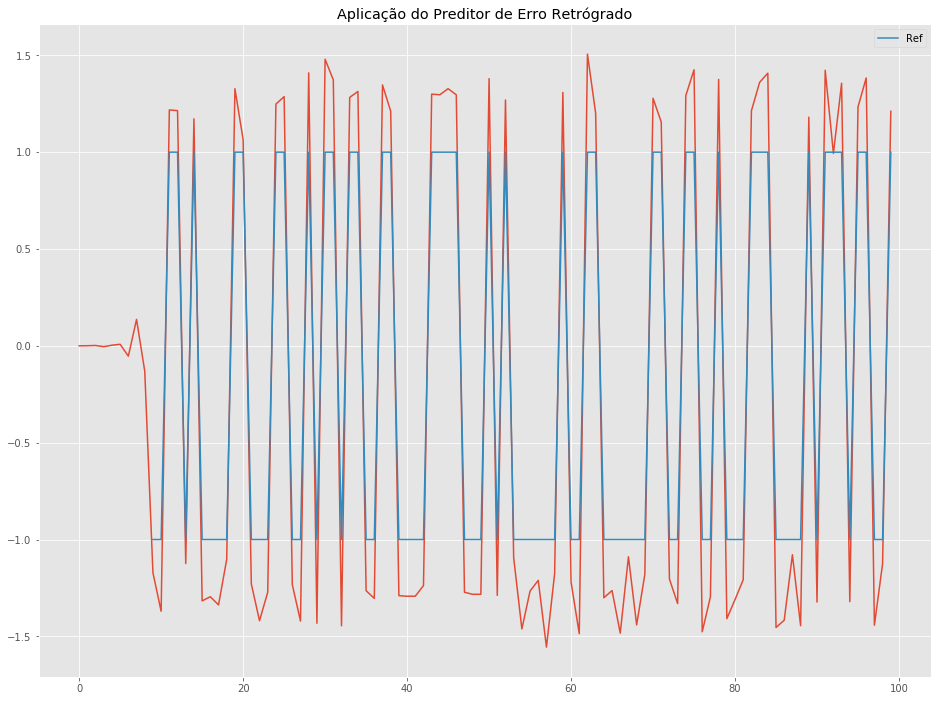

In [45]:
plt.plot(y_backward[:100])
plt.plot(d[:100], label='Ref')
plt.legend()
plt.title('Aplicação do Preditor de Erro Retrógrado')

## Problema 4

In [46]:
def estimate_arbitrary_error_filter(sig, num_parameters, lag=1):
    lag_zero = sig.shape[0] - 1
    r_x = np.correlate(sig, sig, 'full')[lag_zero : lag_zero + num_parameters + lag]

    inv_corr_mat = scipy.linalg.solve_toeplitz(r_x[:-lag], np.eye(num_parameters))

    optimal_params = inv_corr_mat @ (r_x[lag:].T)
    optimal_filter = [1] + [0] * (lag - 1) + (-1 * optimal_params).tolist()
    
    estimate = signal.lfilter(optimal_filter, [1], sig)
    
    return estimate

In [47]:
min_var = np.inf
params_min = None
lag = 1

for num_params, lag in product(range(1, 26), repeat=2):
    estimate = estimate_arbitrary_error_filter(sismograma['sismograma'].reshape(-1), num_params, lag)
    var = estimate.var()
    if var < min_var:
        min_var = var
        params_min = [num_params, lag]

In [48]:
params_min

[25, 1]

In [49]:
refletividade_estim = estimate_arbitrary_error_filter(sismograma['sismograma'].reshape(-1), params_min[0], params_min[1])

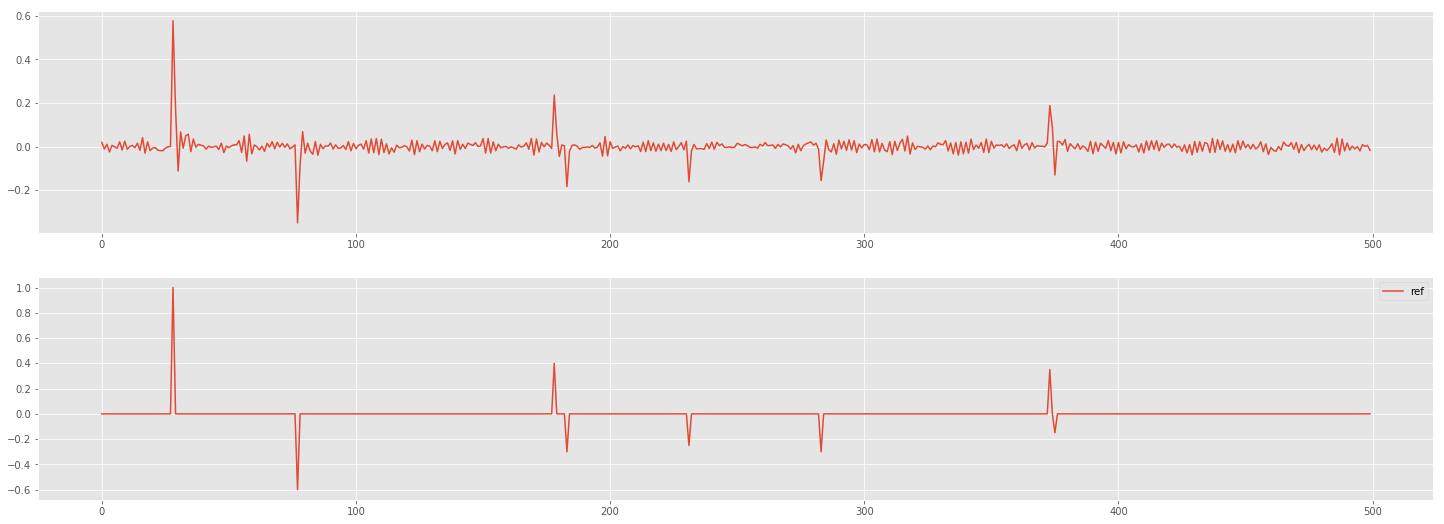

In [50]:
plt.rcParams['figure.figsize'] = [25, 9]
plt.subplot(211)
plt.plot(refletividade_estim)
plt.subplot(212)
plt.plot(refletividade['refletividade'].reshape(-1), label='ref')
plt.legend()

Text(0.5, 1.0, 'Sismograma')

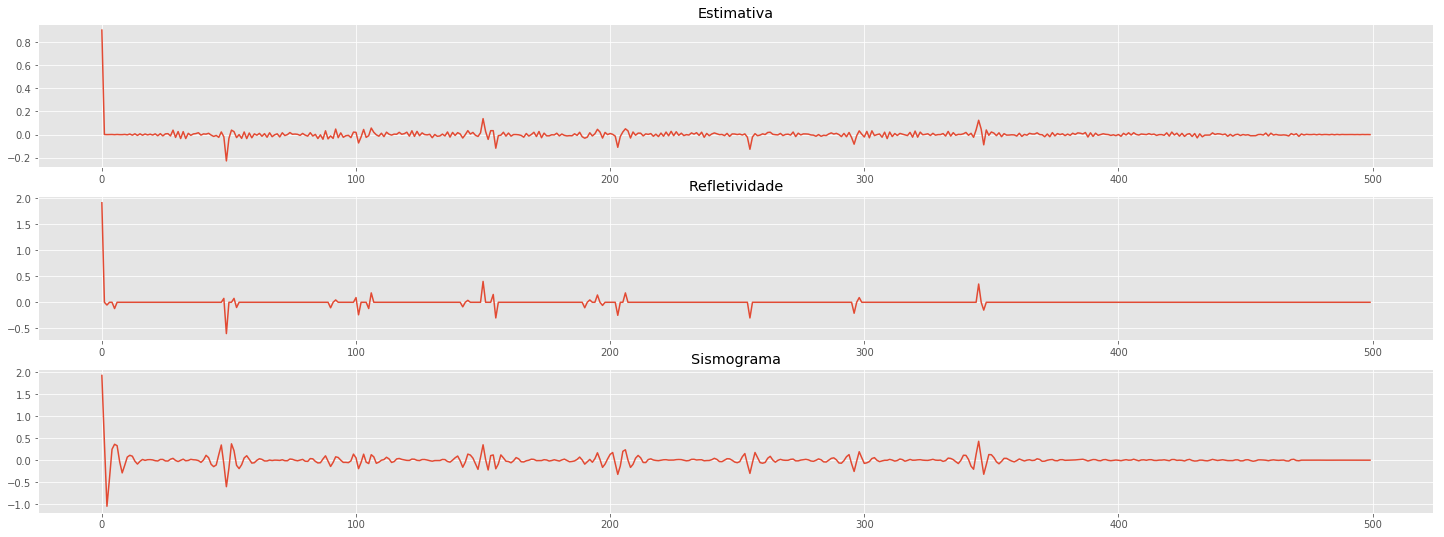

In [51]:
plt.subplot(311)
plt.plot(np.correlate(refletividade_estim, refletividade_estim, 'full')[499:])
plt.title('Estimativa')

plt.subplot(312)
plt.plot(np.correlate(refletividade['refletividade'].reshape(-1), refletividade['refletividade'].reshape(-1), 'full')[499:])
plt.title('Refletividade')

plt.subplot(313)
plt.plot(np.correlate(sismograma['sismograma'].reshape(-1), sismograma['sismograma'].reshape(-1), 'full')[499:])
plt.title('Sismograma')

## Problema 5

#### 5.A: Um filtro com 12 coeficientes
Abaixo, aplicamos um filtro de erro de predição progressiva de passo arbitrário com 12 coeficientes.
Usando como passo a periodicidade das múltiplas, 28, obtemos um sinal estimado que aproxima com erro
praticamente nulo as primárias.
Esse filtro de erro é capaz de realizar a desconvolução, tendo o sinal estimado também uma sequência
de autocorrelação muito similar ao sinal das primárias, tendo a maior parte das oscilações geradas
sido removida.

O sinal estimado ainda apresenta algumas oscilações a mais, com alguns opntos da sequência de autocorrelação
podendo ser confundidos com o ruído residual. Especificamente, a pequena elevação logo após o pico inicial
tem amplitude muito similar às demais oscilações presentes, vistas entre duas primárias.
De modo geral, o sinal estimado se torna muito similar ao sinal objetivo.

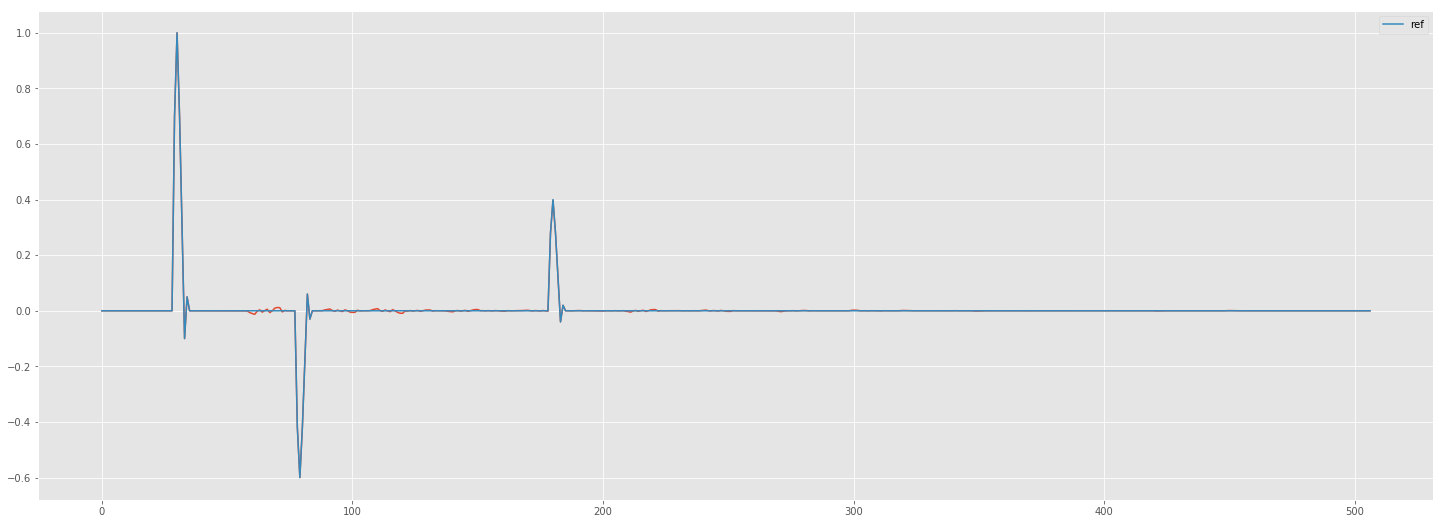

In [52]:
num_coefs = 12 
traco = traco
primarias = primarias
estimate = estimate_arbitrary_error_filter(traco, num_coefs, 28)
plt.plot(estimate)
plt.plot(primarias, label='ref')
plt.legend()

Text(0.5, 1.0, 'Estimativa')

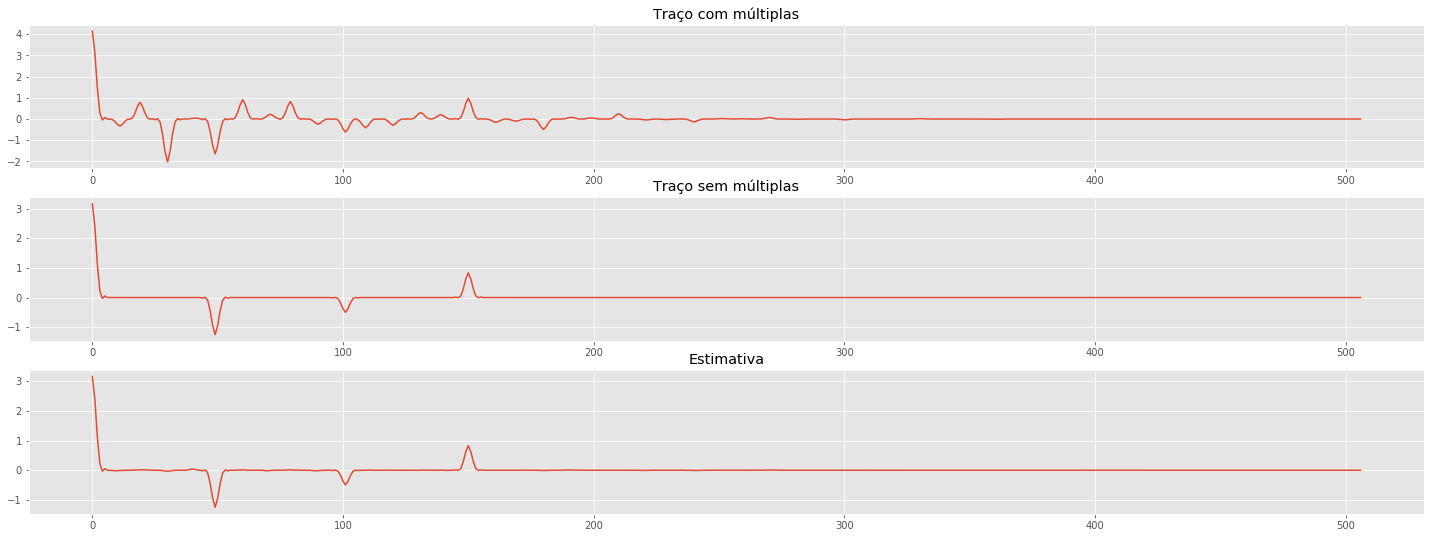

In [53]:
plt.subplot(311)
plt.plot(np.correlate(traco, traco, 'full')[-traco.shape[0]:])
plt.title("Traço com múltiplas")

plt.subplot(312)
plt.plot(np.correlate(primarias, primarias, 'full')[-primarias.shape[0]:])
plt.title("Traço sem múltiplas")

plt.subplot(313)
plt.plot(np.correlate(estimate, estimate, 'full')[-estimate.shape[0]:])
plt.title("Estimativa")

#### 5.B: Um filtro com 50 coeficientes
Aqui, vemos os efeitos negativos de acrescentar parâmetros demais ao filtro de erro.
O sinal estimado pelo filtro com mais parâmetros consegue aproximar bem duas das três principais
ondas presentes. Uma terceira aparece atenuada. O principal ponto notado, no entanto, é
a presença de diversos outros picos espúrios no sinal estimado, o que poderia levar a crer
que há mais ondas primárias do que de fato há.

O tamanho do filtro faz com que, na estimação da segunda onda primária, ainda sejam levados em 
conta as amostras da primeira onda primária, o que gera uma atenuação da segunda, que tem valor 
oposto. Esse tamanho acentuado também faz com que surjam as ondas espúrias entre duas primárias.
A terceira primária, no entanto, está a mais de 50 amostras da segunda, conseguindo assim ser
estimada de forma mais acertada.

Se observarmos a sequência de autocorrelação do sinal estimado, veremos que surgem alguns
padrões que se assemelham aos padrões das ondas primárias, alguns comm amplitude similar.
Dessa forma, a estimativa perdeu qualidade, já que se torna mais difícil diferenciar as ondas
primárias dos picos espúrios produzidos pelo filtro de erro.

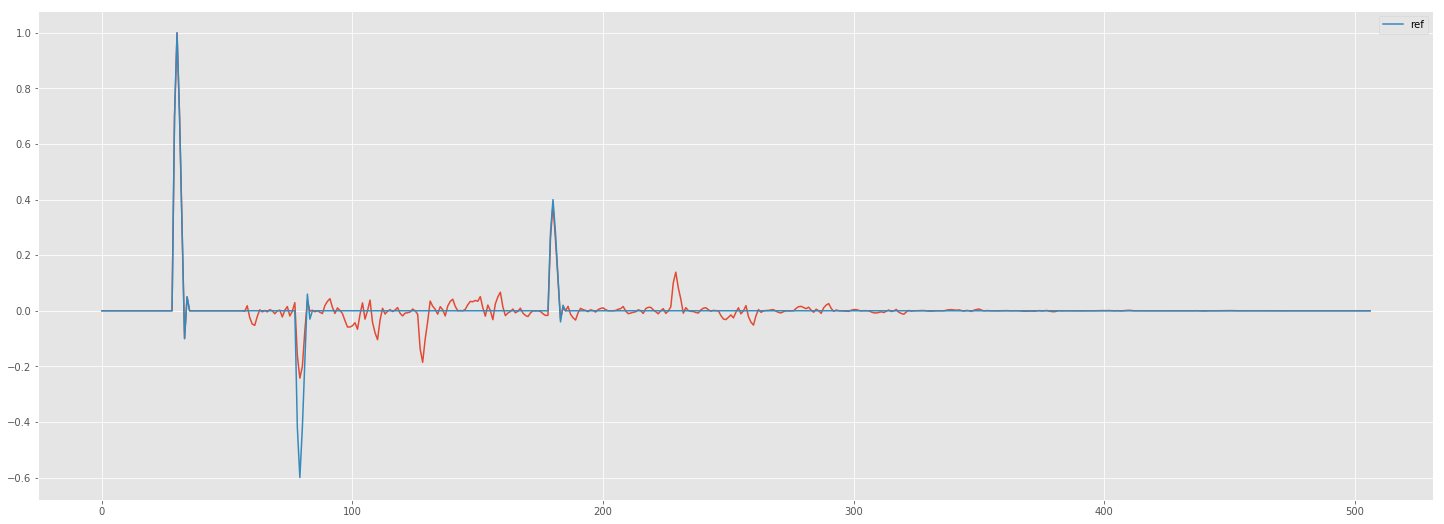

In [54]:
num_coefs = 50
estimate = estimate_arbitrary_error_filter(traco, num_coefs, 28)
plt.plot(estimate)
plt.plot(primarias, label='ref')
plt.legend()

Text(0.5, 1.0, 'Estimativa')

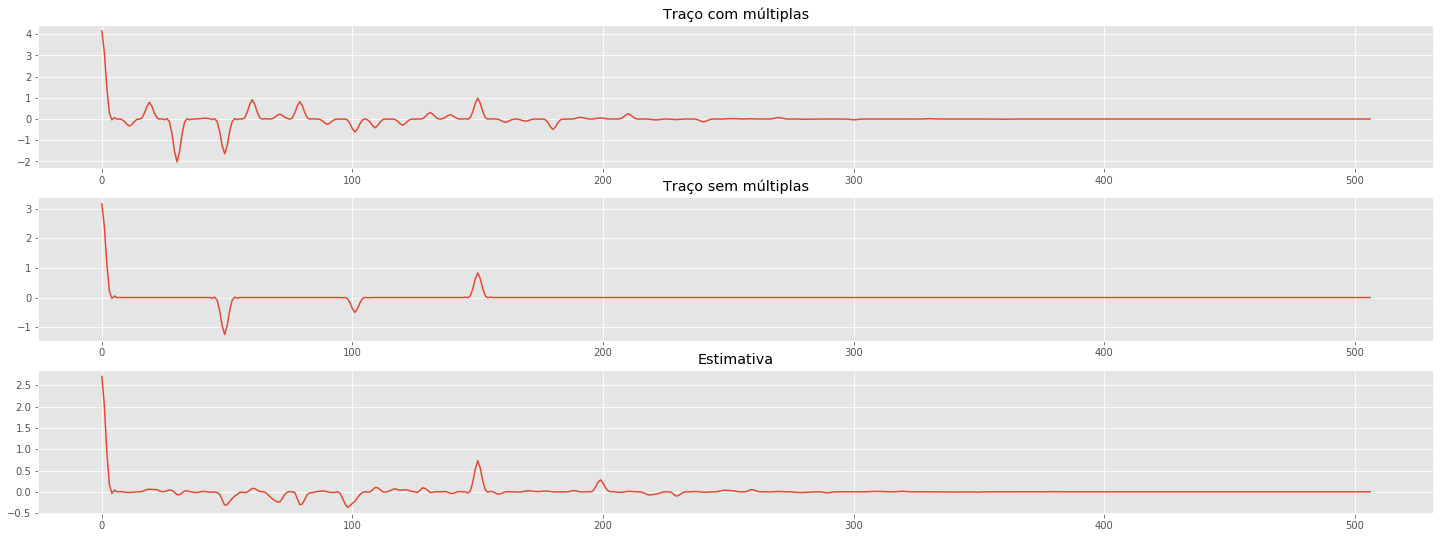

In [55]:
plt.subplot(311)
plt.plot(np.correlate(traco, traco, 'full')[-traco.shape[0]:])
plt.title("Traço com múltiplas")

plt.subplot(312)
plt.plot(np.correlate(primarias, primarias, 'full')[-primarias.shape[0]:])
plt.title("Traço sem múltiplas")

plt.subplot(313)
plt.plot(np.correlate(estimate, estimate, 'full')[-estimate.shape[0]:])
plt.title("Estimativa")